In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read Data
data = pd.read_csv('Train.csv') ## Source: https://www.kaggle.com/datasets/vetrirah/customer?select=Train.csv

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Check missing data
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
# Dropping records if there's any NA
data.dropna(inplace = True)

In [6]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,6665.00000,6665.000000,6665.000000,6665.000000
mean,463519.84096,43.536084,2.629107,2.841110
std,2566.43174,16.524054,3.405365,1.524743
min,458982.00000,18.000000,0.000000,1.000000
25%,461349.00000,31.000000,0.000000,2.000000
50%,463575.00000,41.000000,1.000000,2.000000
75%,465741.00000,53.000000,4.000000,4.000000
max,467974.00000,89.000000,14.000000,9.000000


In [7]:
categories = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']
cont_features = ['Age','Work_Experience','Family_Size']

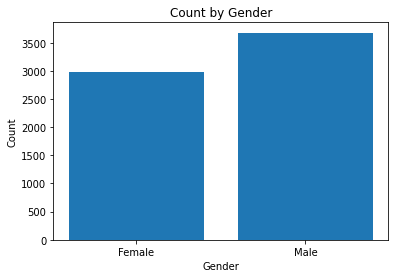

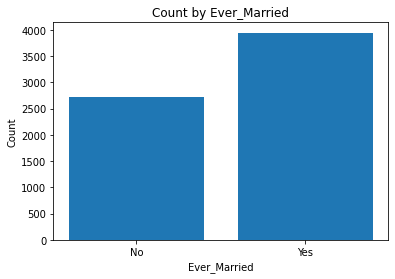

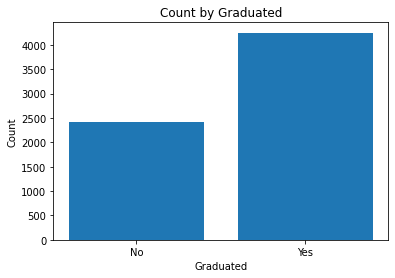

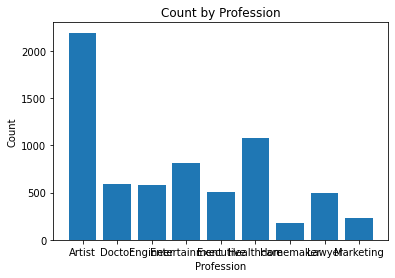

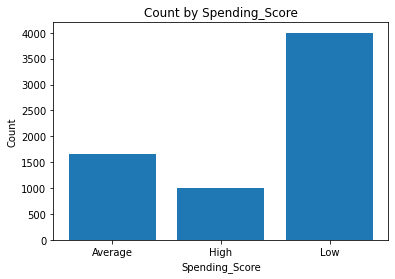

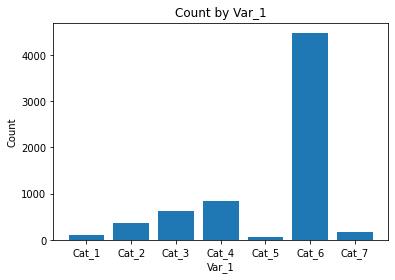

In [8]:
for i in categories:
    
    dfg = data.groupby([i])[i].count()
    
    fig, ax = plt.subplots()
    ax.bar(dfg.index, dfg.values)

    ax.set_ylabel('Count')
    ax.set_xlabel(f'{i}')
    ax.set_title(f'Count by {i}')


## Pre-processing

In [9]:
data.drop(['ID','Segmentation'], inplace= True, axis = 1)

In [10]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [11]:
data.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [12]:
categories

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

enc = OneHotEncoder(handle_unknown='ignore', sparse = False)
scaler = StandardScaler()

encoded_columns = enc.fit_transform(data[categories])
scaled_columns = scaler.fit_transform(data[cont_features])


In [14]:
# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [15]:
## Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(processed_data)

In [16]:
processed_data.shape

(6665, 28)

In [17]:
pc.shape


(6665, 2)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(pc)

In [19]:
predictions = kmeans.predict(pc)

In [20]:
# https://stackoverflow.com/questions/16992713/translate-every-element-in-numpy-array-according-to-key
color_map = {1:'blue', 2:'orange', 3:'green', 0:'red'}
color_assignment = np.vectorize(color_map.get)(predictions)


In [21]:
print(f"This data point is predicted to be in cluster {predictions[0]} which is labeled {color_map[predictions[0]]}.")
print(data.iloc[0,:])
#print()



This data point is predicted to be in cluster 0 which is labeled red.
Gender                   Male
Ever_Married               No
Age                        22
Graduated                  No
Profession         Healthcare
Work_Experience           1.0
Spending_Score            Low
Family_Size               4.0
Var_1                   Cat_4
Name: 0, dtype: object


In [22]:
x = [i[0] for i in pc]
y = [i[1] for i in pc]
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Customers Assigned by Segment')

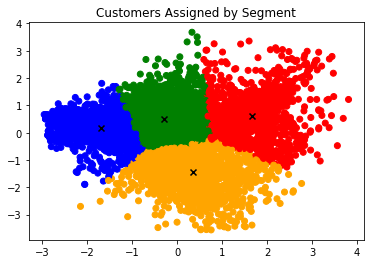

In [31]:
plt.scatter(x, y, color = color_assignment)
plt.scatter(centroids[:,0] ,centroids[:,1], marker = 'x', color = 'black')
plt.title('Customers Assigned by Segment')


## Resources

- https://www.kaggle.com/code/serhanayberkkl/customer-segmentation
- https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
- https://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset